# The purpose of this notebook is to compare the Umap generated by four integration methods

In [1]:
library(ensemblemerge)
library(ggplot2)
library(Seurat)
library(Matrix)
library(cowplot)
library(tidyverse)

Warning message:
“multiple methods tables found for ‘aperm’”
Warning message:
“replacing previous import ‘BiocGenerics::aperm’ by ‘DelayedArray::aperm’ when loading ‘SummarizedExperiment’”
Attaching SeuratObject

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   0.3.5      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()


In [ ]:
1+1

## Read the generated data

In [2]:
toy <- list(
  "NoBatchCorrection" = readRDS("~/Batch_correction_comp/toy_nobatch.rds"),
  "Harmony" = readRDS("~/Batch_correction_comp/toy_Harmony.rds"),
  "FastMNN" = readRDS("~/Batch_correction_comp/toy_FastMNN.rds"),
  "Liger" = readRDS("~/Batch_correction_comp/toy_LigerMerge.rds"),
  "Seurat" = readRDS("~/Batch_correction_comp/toy_Seurat.rds")
)

## Generate the umap

In [3]:
p_time <- lapply(1:length(toy), function(i){

  Idents(toy[[i]]) <- "Time"
  p_time <- DimPlot(toy[[i]], reduction = "umap") + ggtitle(sprintf("%s", names(toy)[i]))
  p_time
})

p_Sorted <- lapply(1:length(toy), function(i){

  Idents(toy[[i]]) <- "Sorted"
  p_Sorted <- DimPlot(toy[[i]], reduction = "umap") + ggtitle(sprintf("%s", names(toy)[i]))
  p_Sorted
})

p_cluster <- lapply(1:length(toy), function(i){

  Idents(toy[[i]]) <- "clustifyrAnnotate"
  p_cluster <- DimPlot(toy[[i]], reduction = "umap") + ggtitle(sprintf("%s", names(toy)[i]))
  p_cluster
})

p_group <- lapply(1:length(toy), function(i){

  Idents(toy[[i]]) <- "group"
  p_group <- DimPlot(toy[[i]], reduction = "umap") + ggtitle(sprintf("%s", names(toy)[i]))
  p_group
})

p_cell <- lapply(1:length(toy), function(i){

  Idents(toy[[i]]) <- "LouvainCluster"
  p_cell <- DimPlot(toy[[i]], reduction = "umap") + ggtitle(sprintf("%s", names(toy)[i]))
  p_cell
})

In [5]:
plots <- plot_grid(p_time[[1]] , p_time[[2]] , p_time[[3]] , p_time[[4]] , p_time[[5]], 
          p_Sorted[[1]] , p_Sorted[[2]] , p_Sorted[[3]] , p_Sorted[[4]] , p_Sorted[[5]], 
          p_cell[[1]] , p_cell[[2]] , p_cell[[3]] , p_cell[[4]] , p_cell[[5]], 
          p_group[[1]] , p_group[[2]] , p_group[[3]] , p_group[[4]] , p_group[[5]], 
          p_cluster[[1]] , p_cluster[[2]] , p_cluster[[3]] , p_cluster[[4]] , p_cluster[[5]], 
          
             ncol = 5, nrow = 5)

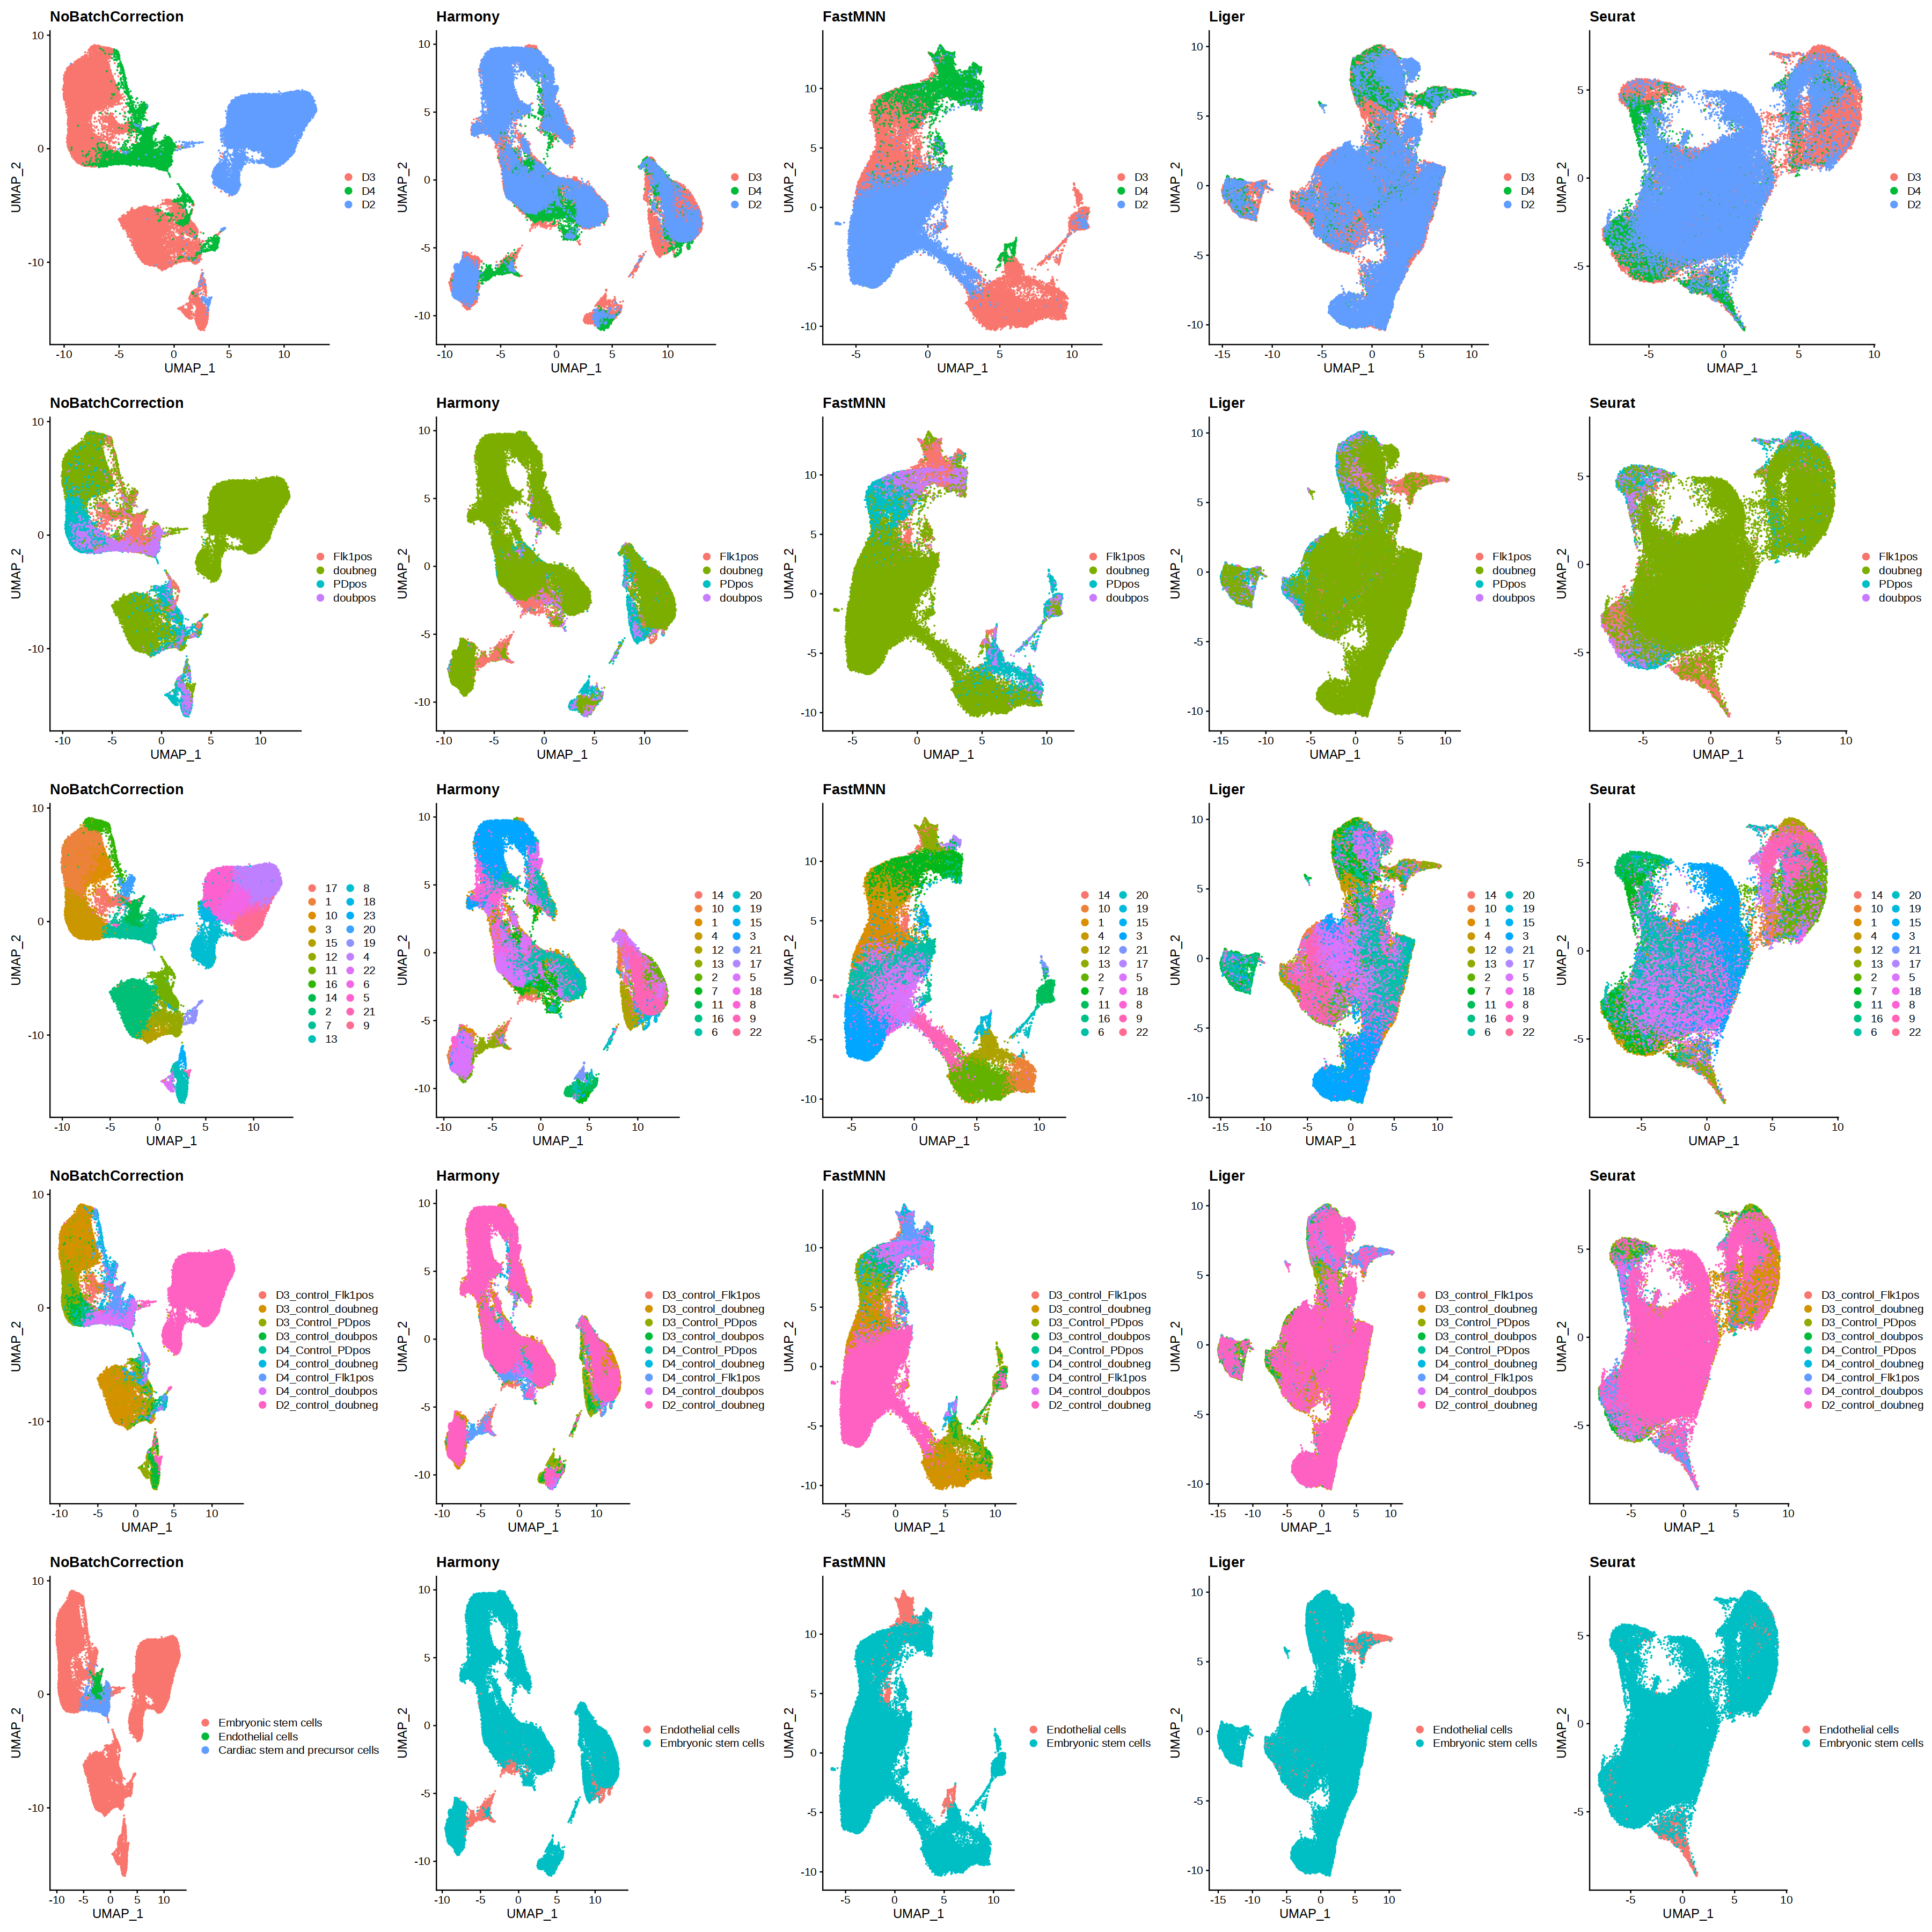

In [6]:
options(repr.plot.width = 30, repr.plot.height = 30)
plots

In [7]:
#saveRDS(plots,"~/Batch_correction_comp/full_plots.rds")